From https://helloworld.co.in/article/ai-robot-human-following-robot-using-tensorflow-lite-raspberry-pi

```
git clone https://github.com/jiteshsaini/robotics-level-4
cp robotics-level-4/earthrover/human_following/common.py .
```

Pour la caméra: https://www.pyimagesearch.com/2015/03/30/accessing-the-raspberry-pi-camera-with-opencv-and-python/

https://hub.gke2.mybinder.org/user/maartenbreddels-ipywebrtc-dxx573p5/notebooks/docs/source/CameraStream.ipynb


In [1]:
from ipywebrtc import CameraStream, ImageRecorder

In [2]:
camera = CameraStream()
camera

CameraStream(constraints={'audio': True, 'video': True})

In [3]:
image_recorder = ImageRecorder(stream=camera)
image_recorder

ImageRecorder(image=Image(value=b''), stream=CameraStream(constraints={'audio': True, 'video': True}))

In [6]:
print(image_recorder)

ImageRecorder(image=Image(value=b''), stream=CameraStream(constraints={'audio': True, 'video': True}))


In [4]:
import PIL.Image
import PIL.ImageFilter
import io
im = PIL.Image.open(io.BytesIO(image_recorder.image.value))

UnidentifiedImageError: cannot identify image file <_io.BytesIO object at 0xb2d71f90>

In [1]:
import time

import cv2
import matplotlib.pyplot as plt

from PIL import Image

import tflite_runtime.interpreter as tflite

import pycoral.utils.edgetpu as edgetpu
from pycoral.adapters import common
from pycoral.adapters import classify
from pycoral.utils.dataset import read_label_file

In [2]:
from flask import Flask, Response
from flask import render_template

app = Flask("main")

In [4]:
@app.route('/')
def index():
    #return "Default Message"
    return render_template("index.html")

@app.route('/video_feed')
def video_feed():
    #global cap
    return Response(main(),
                    mimetype='multipart/x-mixed-replace; boundary=frame')


In [26]:
app.run(host='0.0.0.0', port=2204, threaded=True)

 * Serving Flask app "main" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://0.0.0.0:2204/ (Press CTRL+C to quit)
127.0.0.1 - - [14/Dec/2021 18:25:06] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [14/Dec/2021 18:25:06] "GET /video_feed HTTP/1.1" 200 -


In [25]:
def main():
    while True:
        ret, picture = cap.read()
        picture_rgb = cv2.cvtColor(picture, cv2.COLOR_BGR2RGB)
    
        ret, jpeg = cv2.imencode('.jpg', picture_rgb)
        pic = jpeg.tobytes()
        
        #Flask streaming
        yield (b'--frame\r\n'
               b'Content-Type: image/jpeg\r\n\r\n' + pic + b'\r\n\r\n')

In [10]:
import IPython
import io
def showarray(a, fmt='jpeg'):
    f = io.StringIO()
    PIL.Image.fromarray(a).save(f, fmt)
    IPython.display.display(IPython.display.Image(data=f.getvalue()))

In [7]:
def main2():
    while True:
        ret, picture = cap.read()
        picture_rgb = cv2.cvtColor(picture, cv2.COLOR_BGR2RGB)
    
        picture_rgb = cv2.resize(picture_rgb, (224,224))
        picture_array = Image.fromarray(picture_rgb)
        
        cv2.imshow('frame',picture_rgb)

In [8]:
main2()

error: OpenCV(4.4.0) /tmp/pip-wheel-_v1u9svs/opencv-contrib-python-headless/opencv/modules/highgui/src/window.cpp:651: error: (-2:Unspecified error) The function is not implemented. Rebuild the library with Windows, GTK+ 2.x or Cocoa support. If you are on Ubuntu or Debian, install libgtk2.0-dev and pkg-config, then re-run cmake or configure script in function 'cvShowImage'


In [4]:
cap = cv2.VideoCapture(0)

In [12]:
def take_picture(cap, input_image_size):
    
    ret, picture = cap.read()
    
    picture_rgb = cv2.cvtColor(picture, cv2.COLOR_BGR2RGB)
    picture_rgb = cv2.resize(picture_rgb, input_image_size)
    picture_array = Image.fromarray(picture_rgb)
       
    return  picture_array


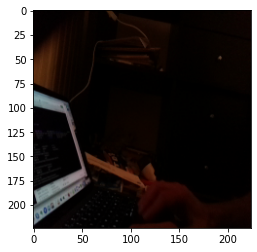

In [13]:
picture_array = take_picture(cap, (224,224))
plt.imshow(picture_array)

In [15]:
coral_accelerator = 1

if (coral_accelerator==1):
    model_file = 'model_edgetpu.tflite'
    interpreter = edgetpu.make_interpreter(model_path_or_content=model_file)
else:
    model_file = 'model_unquant.tflite'
    interpreter = tflite.Interpreter(model_path=model_file)

label_file = 'labels.txt'
fps=1

interpreter.allocate_tensors()
size = common.input_size(interpreter)


In [16]:
def inference(interpreter, picture_array):
    
    common.set_input(interpreter, picture_array)
    interpreter.invoke()
    classes = classify.get_classes(interpreter, top_k=1)
        
    return classes


In [17]:
start_time=time.time()
inference(interpreter, picture_array)
print(time.time()-start_time)

0.034479379653930664


In [ ]:
cap.release()

## Continuous capture

In [ ]:
#this is set to 1 if Coral hardware is used for running the model file.
edgetpu=0

#path where the model file is located
model_dir = './robotics-level-4/all_models' 

#model file
model_edgetpu = 'mobilenet_ssd_v2_coco_quant_postprocess_edgetpu.tflite' 
model = 'mobilenet_ssd_v2_coco_quant_postprocess.tflite' 

#label file corresponding to the model file
lbl = 'coco_labels.txt' 



In [21]:
# threshold of prediction probability (or score). The model will consider an object detected if its score is above this value
threshold=0.2 

# keep the top 5 objects which cross the above threshold.
top_k=5 


In [22]:
arr_dur=[0,0,0]
            

Loading from directory: ./robotics-level-4/all_models 
Loading Model: mobilenet_ssd_v2_coco_quant_postprocess.tflite 
Loading Labels: coco_labels.txt 


In [27]:
objs = inference(interpreter, pil_im)

In [28]:
objs

[Object(id=0, score=0.7890625, bbox=BBox(xmin=0.40218573808670044, ymin=0.1874188780784607, xmax=0.9911863207817078, ymax=1.0)),
 Object(id=83, score=0.2109375, bbox=BBox(xmin=0.18038669228553772, ymin=0.47362571954727173, xmax=0.21157342195510864, ymax=0.6009355187416077))]

In [ ]:
cap.release()
cv2.destroyAllWindows()

In [53]:


pil_im = Image.fromarray(image).convert('RGB')

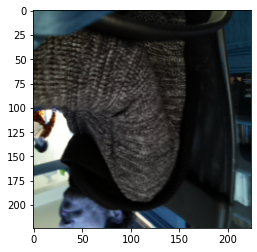

In [54]:
plt.imshow(pil_im)

In [57]:
start_time=time.time()
cm.set_input(interpreter, pil_im)
interpreter.invoke()
objs = cm.get_output(interpreter, score_threshold=threshold, top_k=top_k)
print(time.time()-start_time)

0.07832551002502441


In [31]:
objs

[Object(id=61, score=0.2109375, bbox=BBox(xmin=0.10273978114128113, ymin=0.5324016809463501, xmax=0.8434063196182251, ymax=1.0)),
 Object(id=0, score=0.2109375, bbox=BBox(xmin=0.0, ymin=0.006231725215911865, xmax=0.9611335396766663, ymax=0.974336564540863))]